In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [48]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [49]:
sales = pd.read_csv("superMarket_sales_data.csv")

In [51]:
sales.shape

(1000, 17)

In [52]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [53]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [54]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [59]:
sales['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [60]:
sales['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [61]:
total_gross_income_of_A = sales[sales['Branch']=='A']['gross income'].sum()

print(total_gross_income_of_A)

5057.1605


In [62]:
sales.groupby('Branch')['gross income'].sum()

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64

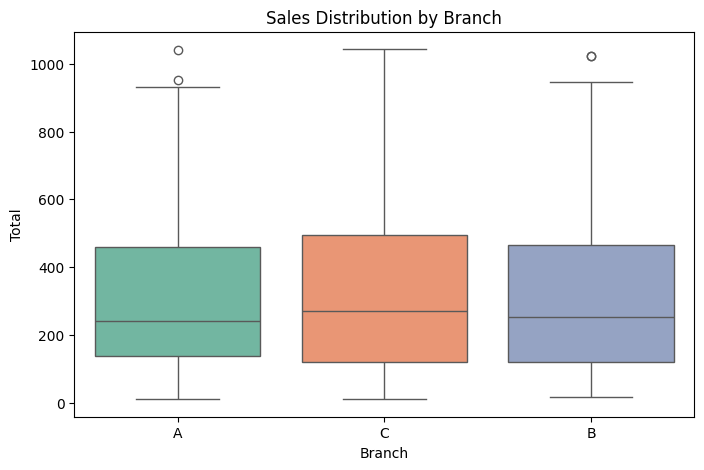

In [63]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=sales, x='Branch', y='Total', palette="Set2")
plt.title("Sales Distribution by Branch")
plt.show()


In [64]:
sales.groupby('Branch')['Total'].max()

Branch
A    1039.29
B    1022.49
C    1042.65
Name: Total, dtype: float64

In [65]:
sales.groupby('Branch')['Total'].describe()

,count,mean,std,min,25%,50%,75%,max
Branch,,,,,,,,
A,340.0,312.354031,231.640025,12.6945,137.489625,240.82800,459.340875,1039.29
B,332.0,319.872506,242.447565,18.6375,119.936250,252.88200,465.585750,1022.49
C,328.0,337.099715,263.160870,10.6785,121.474500,271.41975,495.754875,1042.65


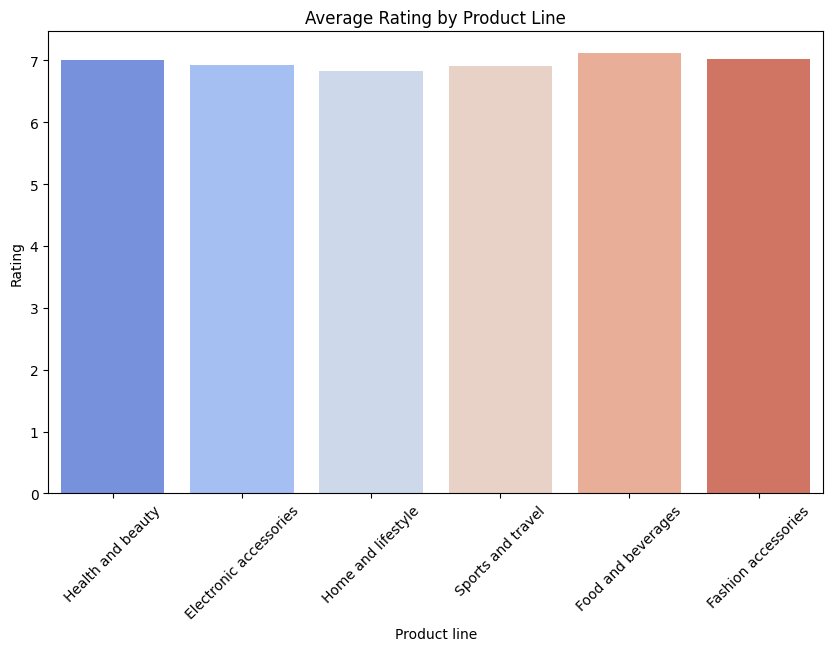

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales, x='Product line', y='Rating', estimator='mean', ci=None, palette="coolwarm")
plt.title("Average Rating by Product Line")
plt.xticks(rotation=45)
plt.show()

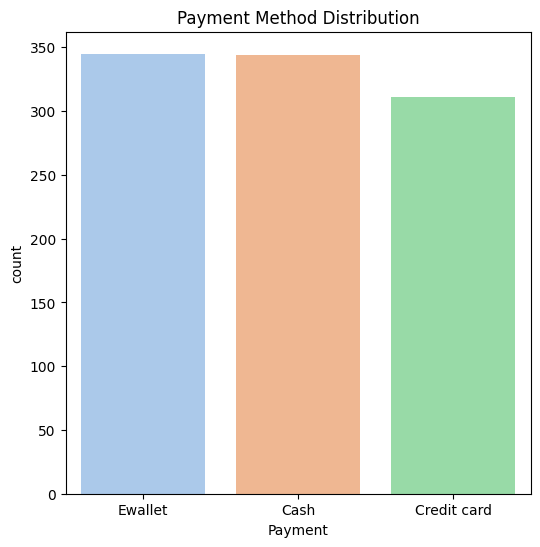

In [67]:
plt.figure(figsize=(6, 6))
sns.countplot(data=sales, x='Payment', palette="pastel")
plt.title("Payment Method Distribution")
plt.show()

In [68]:
sales.groupby('Payment')['Total'].sum()

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

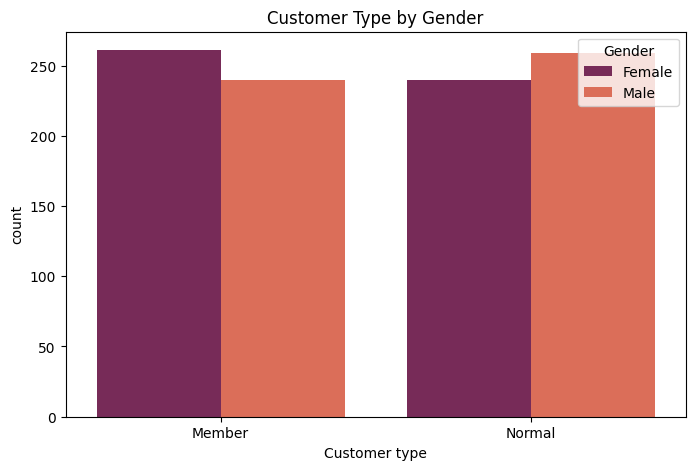

In [69]:
plt.figure(figsize=(8, 5))
sns.countplot(data=sales, x='Customer type', hue='Gender', palette="rocket")
plt.title("Customer Type by Gender")
plt.show()

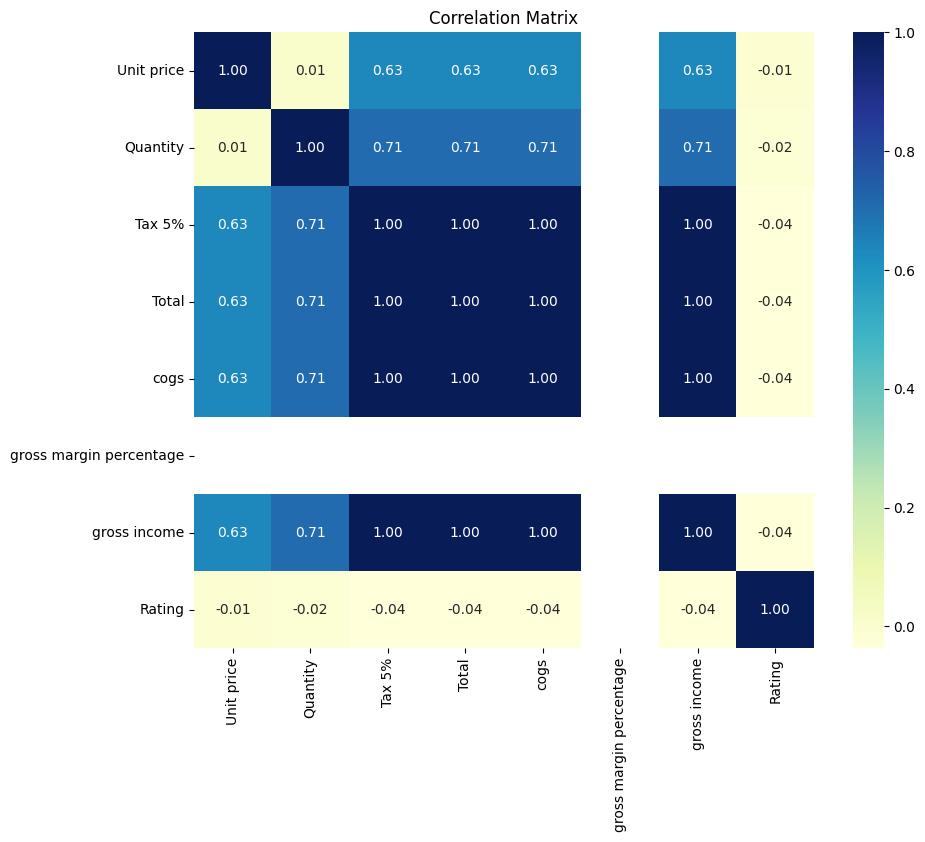

In [71]:
numeric_cols = sales.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

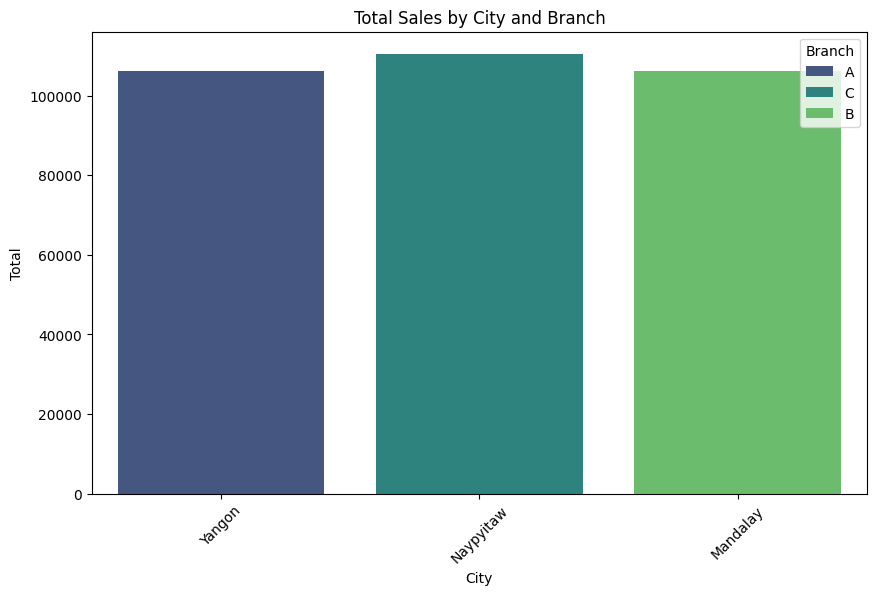

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales, x='City', y='Total', hue='Branch', estimator=sum, ci=None, palette="viridis")
plt.title("Total Sales by City and Branch")
plt.xticks(rotation=45)
plt.show()

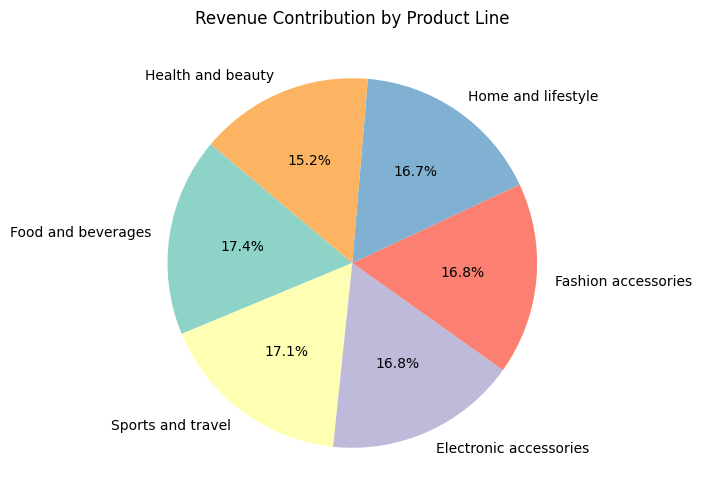

In [73]:
plt.figure(figsize=(10, 6))
product_revenue = sales.groupby('Product line')['Total'].sum().sort_values(ascending=False)
product_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Revenue Contribution by Product Line")
plt.ylabel("")
plt.show()


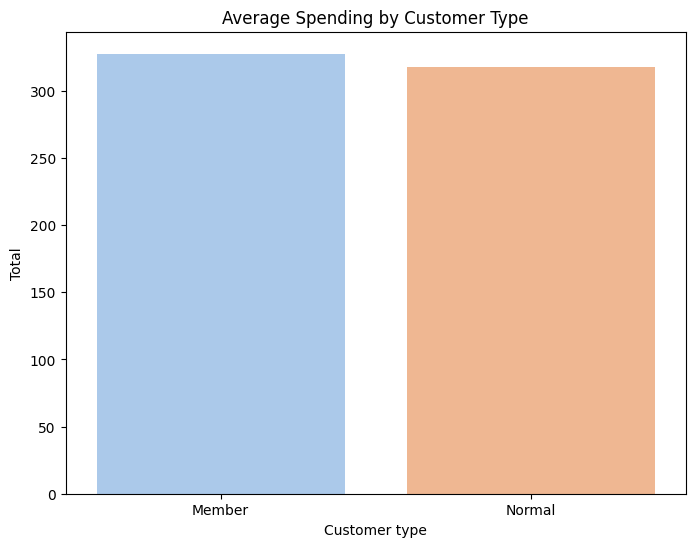

In [74]:
plt.figure(figsize=(8, 6))
sns.barplot(data=sales, x='Customer type', y='Total', estimator='mean', ci=None, palette="pastel")
plt.title("Average Spending by Customer Type")
plt.show()


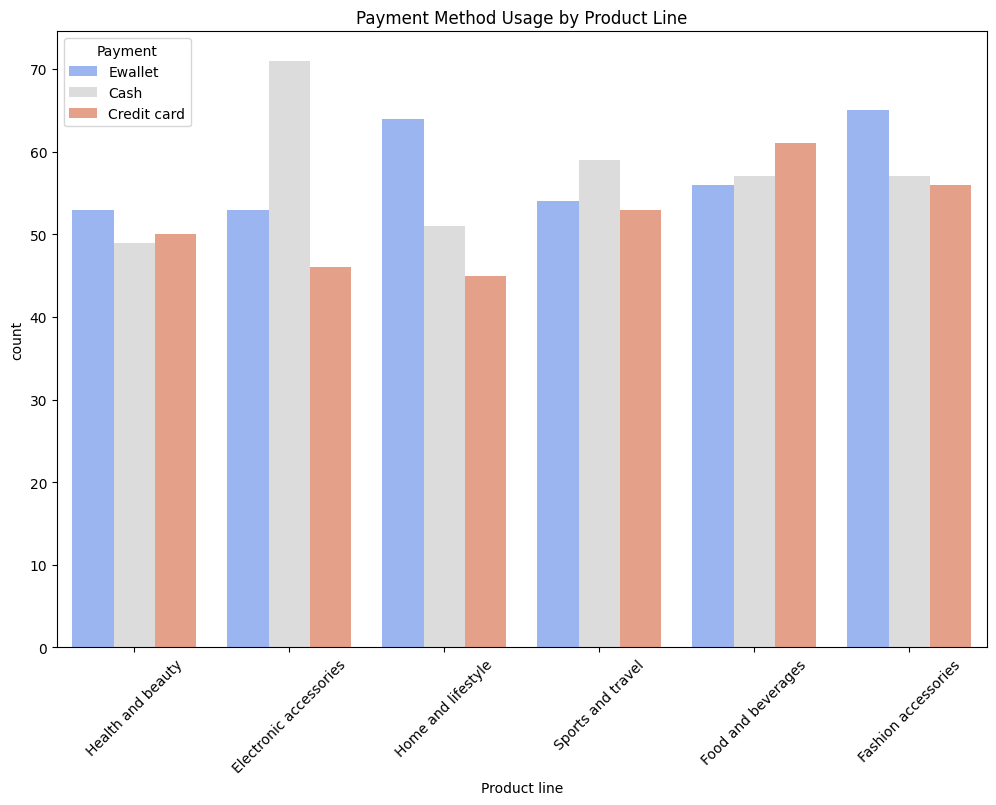

In [75]:
plt.figure(figsize=(12, 8))
sns.countplot(data=sales, x='Product line', hue='Payment', palette="coolwarm")
plt.title("Payment Method Usage by Product Line")
plt.xticks(rotation=45)
plt.show()


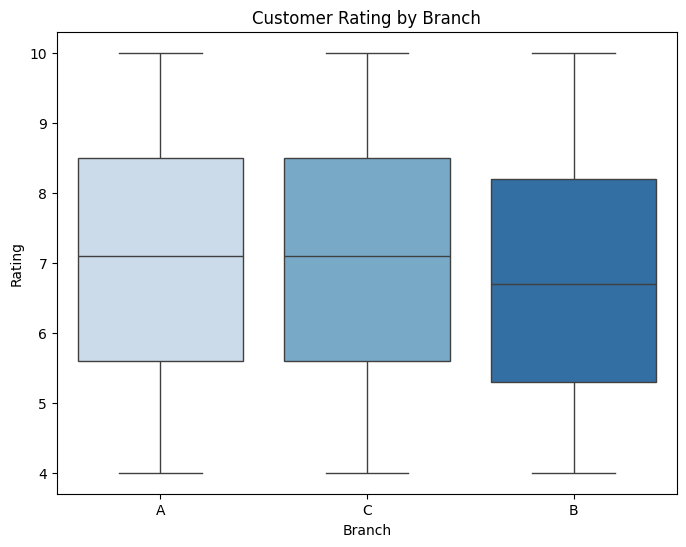

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=sales, x='Branch', y='Rating', palette="Blues")
plt.title("Customer Rating by Branch")
plt.show()


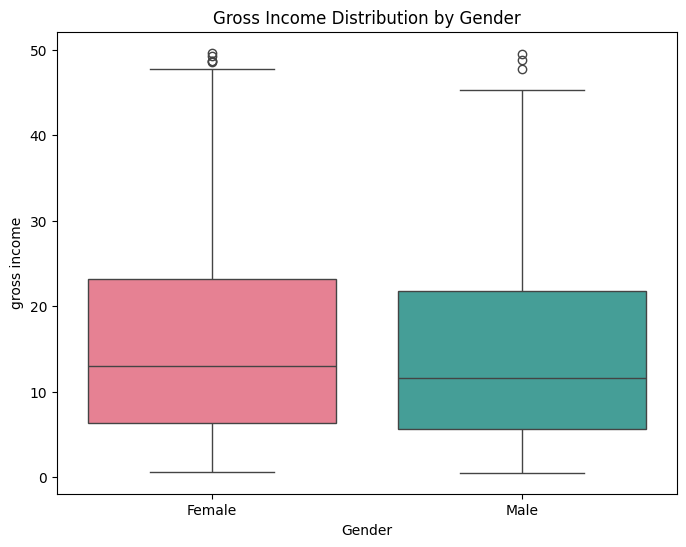

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=sales, x='Gender', y='gross income', palette="husl")
plt.title("Gross Income Distribution by Gender")
plt.show()


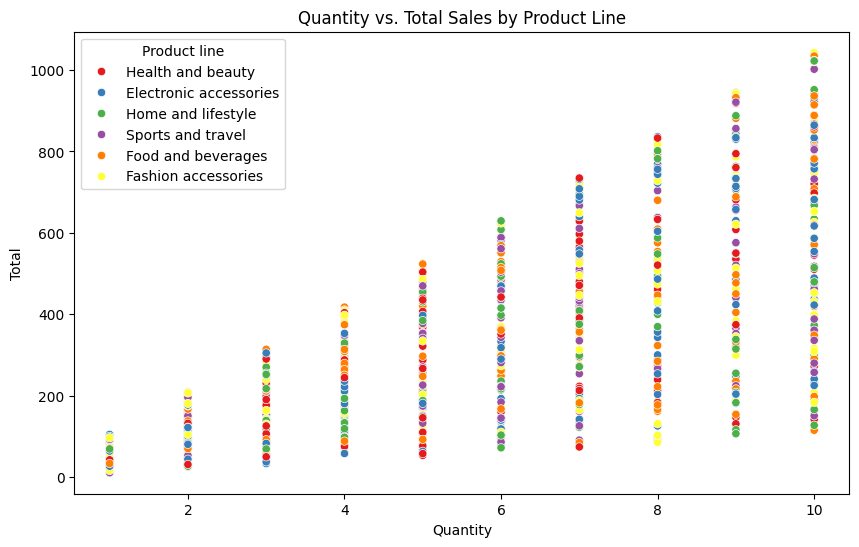

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales, x='Quantity', y='Total', hue='Product line', palette="Set1")
plt.title("Quantity vs. Total Sales by Product Line")
plt.show()


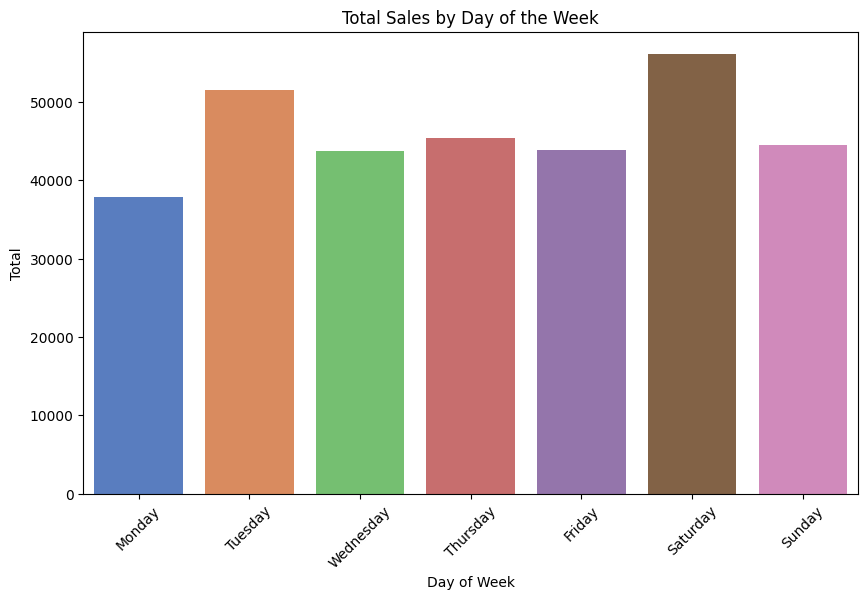

In [79]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Day of Week'] = sales['Date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.barplot(data=sales, x='Day of Week', y='Total', estimator=sum, ci=None, palette="muted",
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Total Sales by Day of the Week")
plt.xticks(rotation=45)
plt.show()


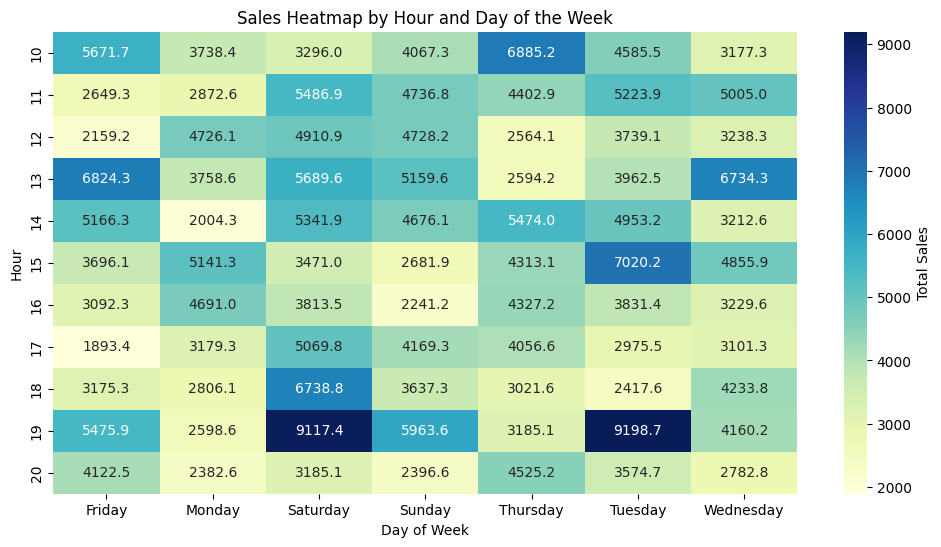

In [81]:
sales['Hour'] = pd.to_datetime(sales['Time']).dt.hour
sales_heatmap = sales.pivot_table(index='Hour', columns='Day of Week', values='Total', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(sales_heatmap, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Total Sales'})
plt.title("Sales Heatmap by Hour and Day of the Week")
plt.show()


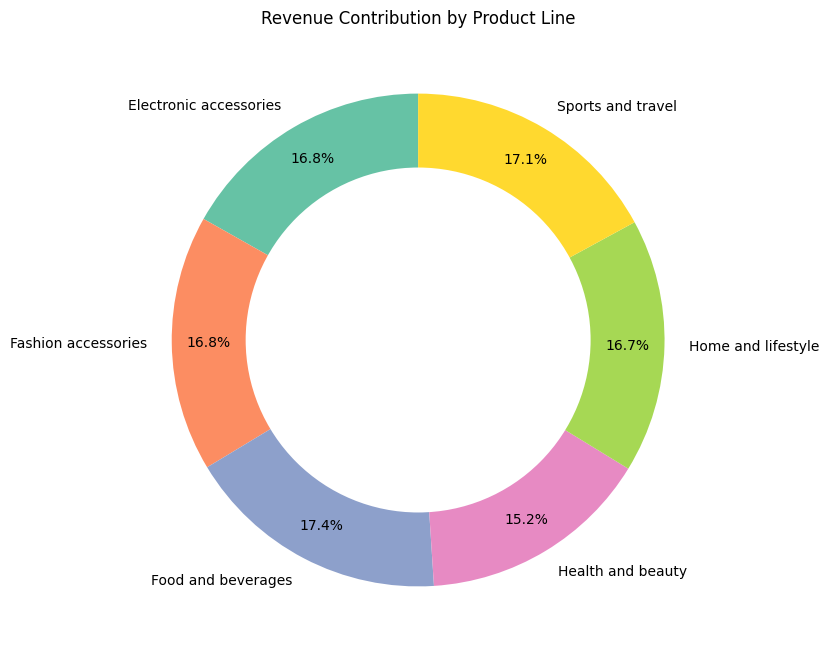

In [82]:
plt.figure(figsize=(8, 8))
product_revenue = sales.groupby('Product line')['Total'].sum()
plt.pie(product_revenue, labels=product_revenue.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=sns.color_palette("Set2"))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Revenue Contribution by Product Line")
plt.show()


In [1]:
sales.sample()

NameError: name 'sales' is not defined